# Sudoku Solving Algorithms

This notebook is used to test and compare different Sudoku solving algorithms.

## Prerequisites

The algorithms used for the app will be used and need to be imported

In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
import_path = module_path+"/backend"
if import_path not in sys.path:
    sys.path.append(import_path)
    
from algorithms.backtracking import solve_sudoku_backtracking
from algorithms.norvig import solve_sudoku_norvig, to_norvig_grid, norvig_to_sudoku
from algorithms.ml import solve_sudoku_ml_inference, solve_sudoku_ml_once
from algorithms.validate import valid_solution

## Data preparation

A random sample with specified size is read from the csv file.
It containts both quizzes and solutions as strings and therefore need to be transformed in the 9x9 array structure used for the algorithms.

In [2]:
import pandas as pd
import numpy as np
import random

# Sample size
n = 1000000
sample_size = 100
skip = sorted(random.sample(range(1,n+1),n-sample_size))

# Read sample from csv
data = pd.read_csv("sudoku.csv", skiprows=skip)
data.head()

def convert_to_shape(digits):
    input = np.fromiter(digits, dtype=np.int8)
    return np.reshape(input, (9,9, 1))

# Convert quizzes to 9x9 array
puzzle_input = data["quizzes"].to_numpy()
puzzles_list = []
for puzzle in puzzle_input:
    res = convert_to_shape(puzzle)
    puzzles_list.append(res)

## Test and validation

To test each algorithms in terms of performance and accuracy a wrapper function was written to obtain those two features.
The performance is measured with the algorithm execution duration and validity is assumed by having the sum of 45 on each of the axis. A comparison to the provided solutions in the csv would also be applicable but slower.

In [3]:
import time

def valid_solution(solution):
    line_sums = np.sum(solution, axis=1)
    return str(np.all(line_sums == 45))

def test_algorithm(algorithm_func, board):
    start = time.perf_counter()
    res = algorithm_func(board)
    end = time.perf_counter()
    
    elapsed = end - start
    return valid_solution(res), elapsed*1000

## Algorithms

Here we load our ML model and wrap our algorithms to fit the test function.

In [4]:
import keras

model = keras.models.load_model('../sudoku.model')

def backtracking(board):
    solve_sudoku_backtracking(board, 0, 0)
    return board

def norvig(board):
    grid = to_norvig_grid(board)
    norvig = solve_sudoku_norvig(grid)
    if not norvig:
        return board
    return np.array(norvig_to_sudoku(norvig), dtype=int)

def ml_once(board):
    return solve_sudoku_ml_once(model,board)
    
def ml_inference(board):
    return solve_sudoku_ml_inference(model,board)

Metal device set to: Apple M1 Pro


2022-07-19 23:09:02.948295: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-19 23:09:02.948416: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Running the test

Here we create a list with our algorithms and dictionaries for storing the results.

For each algorithm all Sudokus from the sample will be tried to solve and then the results stored accordingly.

In [5]:
import copy

algorithms = [backtracking, norvig, ml_once, ml_inference]

results_valid = {"Algorithm":[],"Count":[],"Type":[]}
results_duration = {"Algorithm":[],"Duration":[]}

for algorithm in algorithms:
    valids = 0
    invalids = 0
    for i in range(len(puzzles_list)):
        board = copy.copy(puzzles_list[i])
        valid, elapsed = test_algorithm(algorithm, board)
        if valid == "True":
            valids += 1
        else:
            invalids += 1
        
        results_duration["Algorithm"].append(algorithm.__name__)
        results_duration["Duration"].append(elapsed)
        
    results_valid["Algorithm"].append(algorithm.__name__)
    results_valid["Count"].append(valids)
    results_valid["Type"].append("valid")
    
    results_valid["Algorithm"].append(algorithm.__name__)
    results_valid["Count"].append(invalids)
    results_valid["Type"].append("invalid")
    
    


1/1 [==============================] - 0s 8ms/step


2022-07-19 23:09:04.795142: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-19 23:09:04.840454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 9ms/step


## Results

### Valid results

In the plot below we can see that backtracking and norvig algorithm both have an 100% accuracy while the ml_once has zero. The ml_inference is close to 100%.

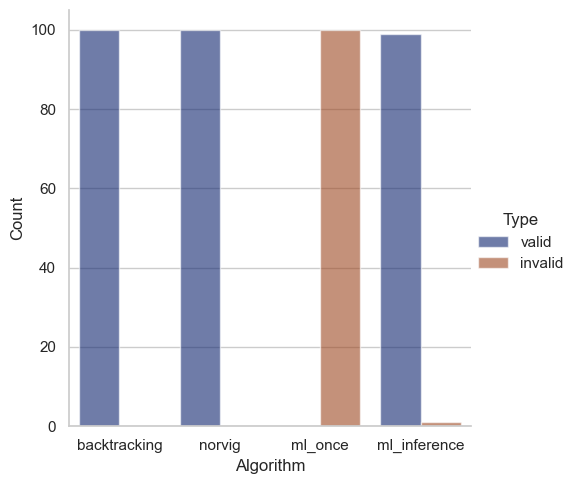

In [12]:
import seaborn as sns

sns.set_theme(style="whitegrid")

df_val = pd.DataFrame.from_dict(results_valid)
g = sns.catplot(data=df_val, kind="bar", 
                x="Algorithm", y="Count", hue="Type",
                palette="dark", alpha=.6, height=5)

g.savefig("valid_all.png", dpi=300)

### Duration (all)

In the plot for the compared durations for all algorithms we can see that the ml_inference algorithm takes exceptionally long compared to the other algorithms, while the other ones are similiar on this scale.

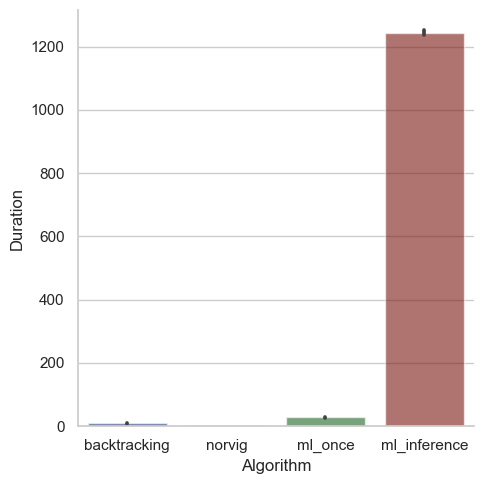

In [11]:
df_dur = pd.DataFrame.from_dict(results_duration)

g = sns.catplot(data=df_dur, kind="bar", 
                x="Algorithm", y="Duration",
                palette="dark", alpha=.6, height=5)

### Duration (backtracking & norvig)

In this plot we take a look at the backtracking and norvig algorithm since they are both very accurate and fast.
Here we can see that the norvig algorithm is faster and more constant (less standard deviation) in finding a solution compared to the backtracking algorithm.

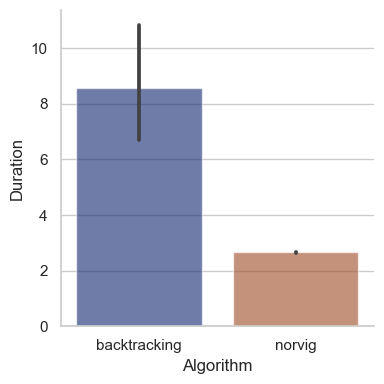

In [8]:
df_dur_no_ml = df_dur.query('Algorithm != "ml_once" & Algorithm != "ml_inference"')

g = sns.catplot(data=df_dur_no_ml, kind="bar", 
                x="Algorithm", y="Duration",
                palette="dark", alpha=.6, height=4)